In [1]:
import scipy.signal as signal


In [2]:
# The "Daubechies" wavelet is a rough approximation to a real,
# single, heart beat ("pqrst") signal
pqrst = signal.wavelets.daub(10)

In [1]:
%matplotlib inline
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
cd ../../../Data/fusrp_2

C:\Users\Lauren\Data\fusrp_2


In [3]:
# load data into a dataframe
hb_df = pd.read_csv("MIT_500_s.csv", header=None)

In [4]:
import pywt

In [10]:
hb_df = np.ravel(hb_df)

In [12]:
wp = pywt.WaveletPacket(data=hb_df, wavelet='db1')

In [14]:
wp.maxlevel

17

In [15]:
cA, cD = pywt.dwt(hb_df, 'db2')

In [17]:
cA, cD

(array([-0.20506097, -0.20506097, -0.20506097, ..., -0.15657307,
         0.60125726,  1.0268561 ]),
 array([ 0.        ,  0.        ,  0.        , ..., -0.01324125,
         0.10983383,  0.05856859]))

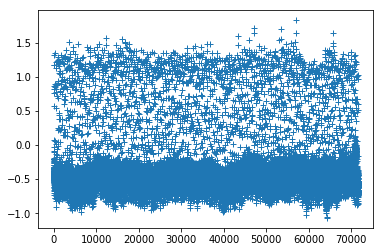

In [51]:
plt.plot(cA,'+')

In [24]:
time = np.arange(len(hb_df))

(1000, 2000)

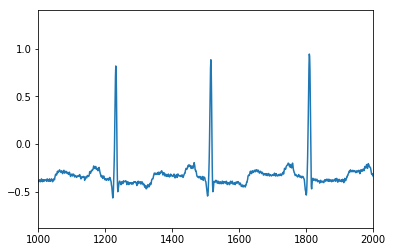

In [31]:
f, ax = plt.subplots()
ax.plot(time,hb_df)
xlim = [1000,2000]  # plotting range
ax.set_xlim(xlim)

In [47]:
ecg = hb_df[1000:2000]

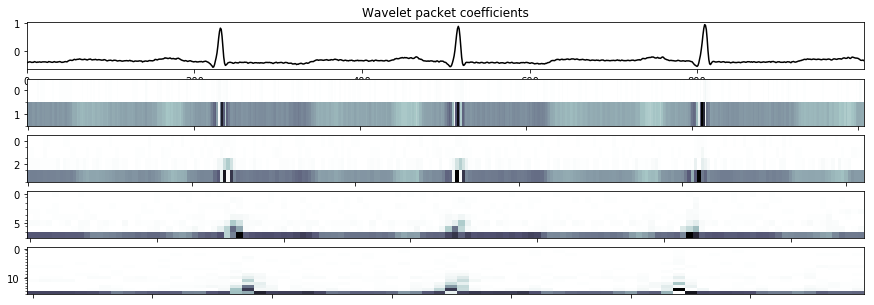

In [48]:
wp = WaveletPacket(ecg, 'sym5', maxlevel=4)

fig = plt.figure(figsize=(15,5))
plt.set_cmap('bone')
ax = fig.add_subplot(wp.maxlevel + 1, 1, 1)
ax.plot(ecg, 'k')
ax.set_xlim(0, len(ecg) - 1)
ax.set_title("Wavelet packet coefficients")

for level in range(1, wp.maxlevel + 1):
    ax = fig.add_subplot(wp.maxlevel + 1, 1, level + 1)
    nodes = wp.get_level(level, "freq")
    nodes.reverse()
    labels = [n.path for n in nodes]
    values = -abs(np.array([n.data for n in nodes]))
    ax.imshow(values, interpolation='nearest', aspect='auto')
    ax.set_yticks(np.arange(len(labels) - 0.5, -0.5, -1), labels)
    plt.setp(ax.get_xticklabels(), visible=False)

plt.show()

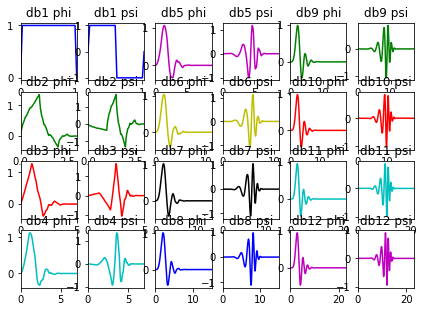

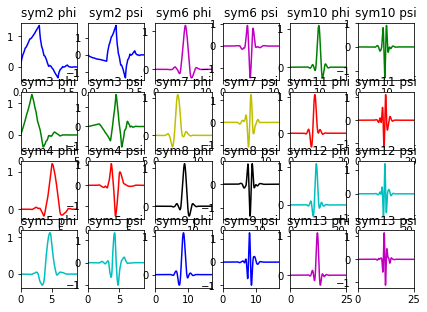

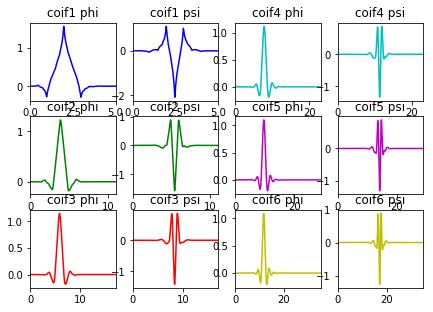

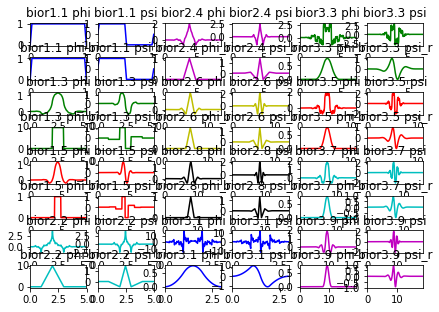

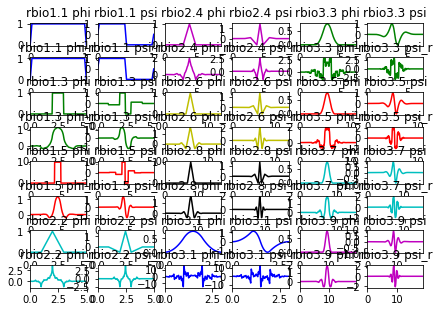

In [35]:
import itertools

import matplotlib.pyplot as plt

import pywt


plot_data = [('db', (4, 3)),
             ('sym', (4, 3)),
             ('coif', (3, 2))]


for family, (rows, cols) in plot_data:
    fig = plt.figure()
    fig.subplots_adjust(hspace=0.2, wspace=0.2, bottom=.02, left=.06,
                        right=.97, top=.94)
    colors = itertools.cycle('bgrcmyk')

    wnames = pywt.wavelist(family)
    i = iter(wnames)
    for col in range(cols):
        for row in range(rows):
            try:
                wavelet = pywt.Wavelet(next(i))
            except StopIteration:
                break
            phi, psi, x = wavelet.wavefun(level=5)

            color = next(colors)
            ax = fig.add_subplot(rows, 2 * cols, 1 + 2 * (col + row * cols))
            ax.set_title(wavelet.name + " phi")
            ax.plot(x, phi, color)
            ax.set_xlim(min(x), max(x))

            ax = fig.add_subplot(rows, 2*cols, 1 + 2*(col + row*cols) + 1)
            ax.set_title(wavelet.name + " psi")
            ax.plot(x, psi, color)
            ax.set_xlim(min(x), max(x))

for family, (rows, cols) in [('bior', (4, 3)), ('rbio', (4, 3))]:
    fig = plt.figure()
    fig.subplots_adjust(hspace=0.5, wspace=0.2, bottom=.02, left=.06,
                        right=.97, top=.94)

    colors = itertools.cycle('bgrcmyk')
    wnames = pywt.wavelist(family)
    i = iter(wnames)
    for col in range(cols):
        for row in range(rows):
            try:
                wavelet = pywt.Wavelet(next(i))
            except StopIteration:
                break
            phi, psi, phi_r, psi_r, x = wavelet.wavefun(level=5)
            row *= 2

            color = next(colors)
            ax = fig.add_subplot(2*rows, 2*cols, 1 + 2*(col + row*cols))
            ax.set_title(wavelet.name + " phi")
            ax.plot(x, phi, color)
            ax.set_xlim(min(x), max(x))

            ax = fig.add_subplot(2*rows, 2*cols, 2*(1 + col + row*cols))
            ax.set_title(wavelet.name + " psi")
            ax.plot(x, psi, color)
            ax.set_xlim(min(x), max(x))

            row += 1
            ax = fig.add_subplot(2*rows, 2*cols, 1 + 2*(col + row*cols))
            ax.set_title(wavelet.name + " phi_r")
            ax.plot(x, phi_r, color)
            ax.set_xlim(min(x), max(x))

            ax = fig.add_subplot(2*rows, 2*cols, 1 + 2*(col + row*cols) + 1)
            ax.set_title(wavelet.name + " psi_r")
            ax.plot(x, psi_r, color)
            ax.set_xlim(min(x), max(x))

plt.show()

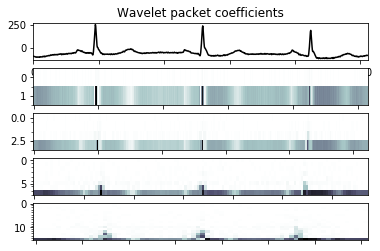

In [37]:
import os

import numpy as np
import matplotlib.pyplot as plt

from pywt import WaveletPacket
import pywt.data

ecg = pywt.data.ecg()

wp = WaveletPacket(ecg, 'sym5', maxlevel=4)

fig = plt.figure()
plt.set_cmap('bone')
ax = fig.add_subplot(wp.maxlevel + 1, 1, 1)
ax.plot(ecg, 'k')
ax.set_xlim(0, len(ecg) - 1)
ax.set_title("Wavelet packet coefficients")

for level in range(1, wp.maxlevel + 1):
    ax = fig.add_subplot(wp.maxlevel + 1, 1, level + 1)
    nodes = wp.get_level(level, "freq")
    nodes.reverse()
    labels = [n.path for n in nodes]
    values = -abs(np.array([n.data for n in nodes]))
    ax.imshow(values, interpolation='nearest', aspect='auto')
    ax.set_yticks(np.arange(len(labels) - 0.5, -0.5, -1), labels)
    plt.setp(ax.get_xticklabels(), visible=False)

plt.show()